In [1]:
from __future__ import division
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

In [2]:
iris = sns.load_dataset("iris")
iris.head(n=5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris = pd.get_dummies(iris, columns=['species'])
# one hot encoding
iris.head(n=5)

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [4]:
values = iris.iloc[:,:].values
# print (values)

In [5]:
#Output
y = iris.iloc[:,-3:].values
# y = np.array(y)
# print (y)

In [6]:
# Features
x = iris.iloc[:,0:-3].values
# len(x)
# print  (x)

In [7]:
# Weights
w1 = np.random.randn(4,4)
w2 = np.random.randn(4,3)
# print (w)
# vector_b = np.array([0.5, 0.5, 0.78])

In [8]:
# Bias
b1 = np.random.randn(4)
b2 = np.random.randn(3)
# print (b)

In [9]:
# Shuffle data
indices = np.random.choice(len(x),len(x),replace = False)
x_values = x[indices]
# print(x_values)
y_values = y[indices]
# print(y_values)

In [10]:
#Creating training and test data in 80:20 ratio
test_size = 20
x_test = x_values[-test_size:]
y_test = y_values[-test_size:]
x_train = x_values[:-test_size]
y_train = y_values[:-test_size]

In [11]:
#Sigmoid Function
def sigmoid(inp):
    return 1 / (1 + np.exp(-inp))

In [12]:
#x*w +b
def layer (x,w,b):
    return sigmoid(np.matmul(x,w)+b)

In [13]:
#cost function
def cost_function(y_predicted,y_truth):
    return 0.5*np.sum(np.square(y_predicted - y_truth), axis = 0)

In [14]:
#Gradient of Cost Function
def df_cost_function(y_predicted, y_truth):
    return np.sum(y_predicted - y_truth)

In [15]:
#Gradient of sigmoid function
def df_sigmoid(y, gradOfCost):
    return gradOfCost*y*(1-y)

In [16]:
#Constructing a Layer
def df_layer(x,w,b,grad_of_cost):
    y = layer(x,w,b)
    df1 = df_sigmoid(y,grad_of_cost)
    return np.matmul(x.T,df1) , np.matmul(df1,w.T) , np.sum(grad_of_cost, axis =0)

In [17]:
#Performing 1000 iterations i.e epochs = 1000
loss_over_time = []
alpha = 1e-4
for i in range (1000):
    layer1 = layer(x_train,w1,b1)
    y_predicted = layer(layer1,w2,b2)

    cost = cost_function(y_predicted,y_train)
    df_loss = df_cost_function(y_predicted,y_train)
    df_w2, df_layer2, df_b2 = df_layer(layer1,w2,b2,df_loss)
    df_w1, df_layer1, df_b1 = df_layer(x_train,w1,b1,df_layer2)
    
    w1 -= alpha * df_w1
    w2 -= alpha * df_w2
    
    b1 -= alpha * df_b1
    b2 -= alpha * df_b2
    
    layer1 = layer(x_train,w1,b1)
    y_predicted = layer(layer1,w2,b2)
    
    cost = cost_function(y_predicted,y_train)
    
    loss_over_time.append(cost[0])

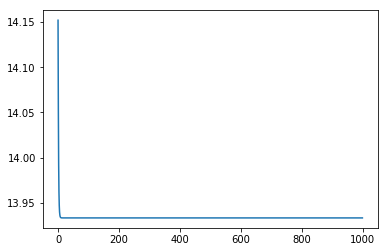

In [18]:
# error vs no. of iterations plot
plt.plot(loss_over_time)